In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Путь к файлу на Google Drive
file_path = '/content/drive/MyDrive/airlines/full_data_flightdelay.csv'
# Чтение CSV-файла с указанием разделителя ";"
dataset = pd.read_csv(file_path, sep=',')

# Вывод списка колонок для проверки
print(dataset.columns)

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX',
       'AWND'],
      dtype='object')


# Анализ данных

In [4]:
# размер датасета, 6489062 записей, 26 столбцов
dataset.shape

(6489062, 26)

In [34]:
# отображаем первые 10 сстрок датасета
pd.set_option('display.max_columns', None)
dataset.head(10)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
5,1,7,0,0001-0559,3,1,10,180,Frontier Airlines Inc.,13056,9496,581,1903352,1857122,0.000116,0.000007,5,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
6,1,7,0,0700-0759,6,1,29,186,Frontier Airlines Inc.,13056,9496,581,1903352,1857122,0.000116,0.000007,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
7,1,7,1,0001-0559,7,1,10,186,Frontier Airlines Inc.,13056,9496,581,1903352,1857122,0.000116,0.000007,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
8,1,7,0,0001-0559,7,1,10,180,Frontier Airlines Inc.,13056,9496,581,1903352,1857122,0.000116,0.000007,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
9,1,7,0,0600-0659,8,1,27,186,Frontier Airlines Inc.,13056,9496,581,1903352,1857122,0.000116,0.000007,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [6]:
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.cluster import KMeans

In [7]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

In [8]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,...,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,3.459251e+03,...,9.753707e-05,1.355612e-04,1.153211e+01,3.670581e+01,-9.425515e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,4.251139e+03,...,8.644459e-05,4.649970e-05,6.935706e+00,5.500804e+00,1.790952e+01,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,...,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.540000e+02,...,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,...,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,...,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,...,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


In [9]:
# TARGET Binary of a departure delay over 15 minutes (1 is yes)
# была ли задержка вылета на 15+ минут (1 - да)

dataset['DEP_DEL15'].unique()

array([0, 1])

In [10]:
# Теперь проверим количество строк, которое принадлежит каждому классу:
dataset['DEP_DEL15'].value_counts()

,count
DEP_DEL15,
0,5261694
1,1227368


In [11]:
# классы не сбалансированы
# сделаем андерсэмплинг

# берем случайный сэмпл класса 0
majority = dataset[dataset['DEP_DEL15'] == 0].sample(1000)
# берем случайный сэмпл класса 1
minority = dataset[dataset['DEP_DEL15'] == 1].sample(1000)
# объединяем
dataset_balanced = pd.concat([majority, minority])

In [29]:
print(dataset_balanced.isnull().sum())

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64


In [52]:
dataset_balanced.drop(['DEP_TIME_BLK', 'PREVIOUS_AIRPORT', 'DEPARTING_AIRPORT', 'CARRIER_NAME'], axis=1, inplace=True)

# Визуализация данных

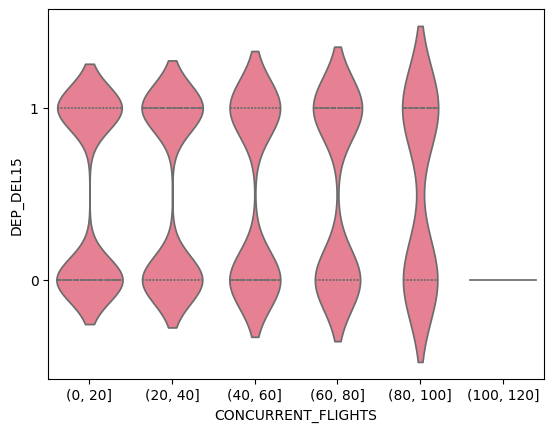

In [12]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

bins = pd.cut(dataset_balanced['CONCURRENT_FLIGHTS'],
                   bins=[0,20,40,60,80,100,120])

v = sns.violinplot(y=dataset_balanced['DEP_DEL15'], x=bins , data=dataset_balanced, inner='quartile')
v.set_yticks([0,1])
plt.show()

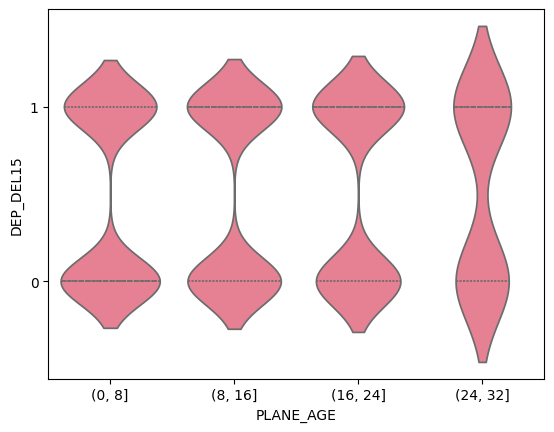

In [13]:
bins = pd.cut(dataset_balanced['PLANE_AGE'],
                   bins=[0,8,16,24,32])
v = sns.violinplot(y=dataset_balanced['DEP_DEL15'], x=bins , data=dataset_balanced, inner='quartile')
v.set_yticks([0,1])
plt.show()

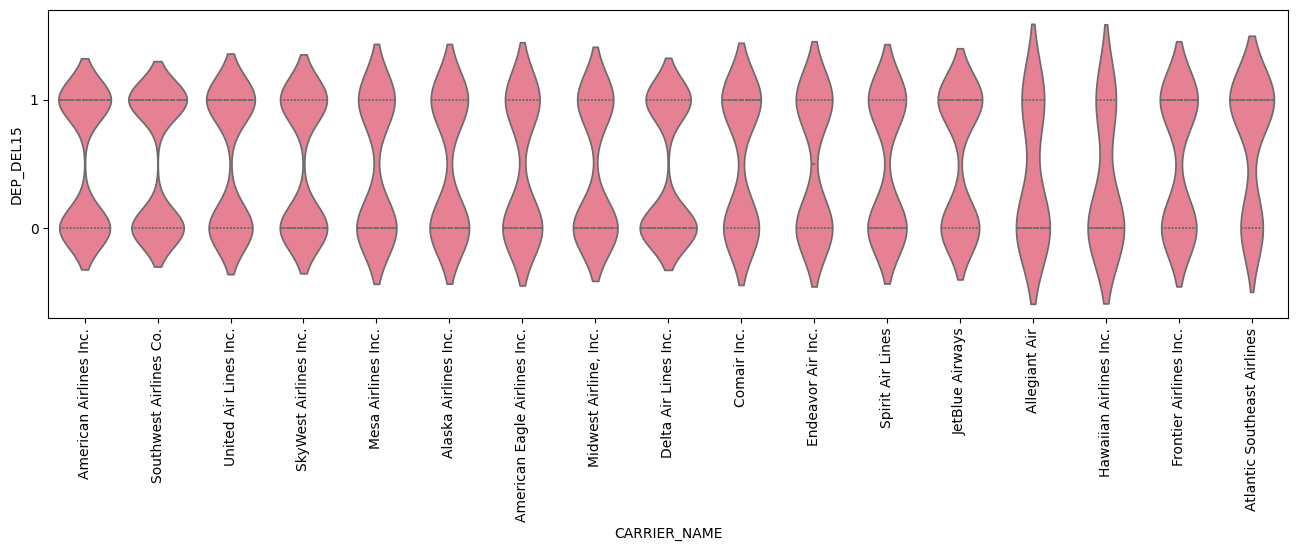

In [14]:
plt.figure(figsize=(16,4))
plt.xticks(rotation='vertical')
v = sns.violinplot(y=dataset_balanced['DEP_DEL15'], x=dataset_balanced['CARRIER_NAME'] , data=dataset_balanced, inner='quartile')
v.set_yticks([0,1])
plt.show()

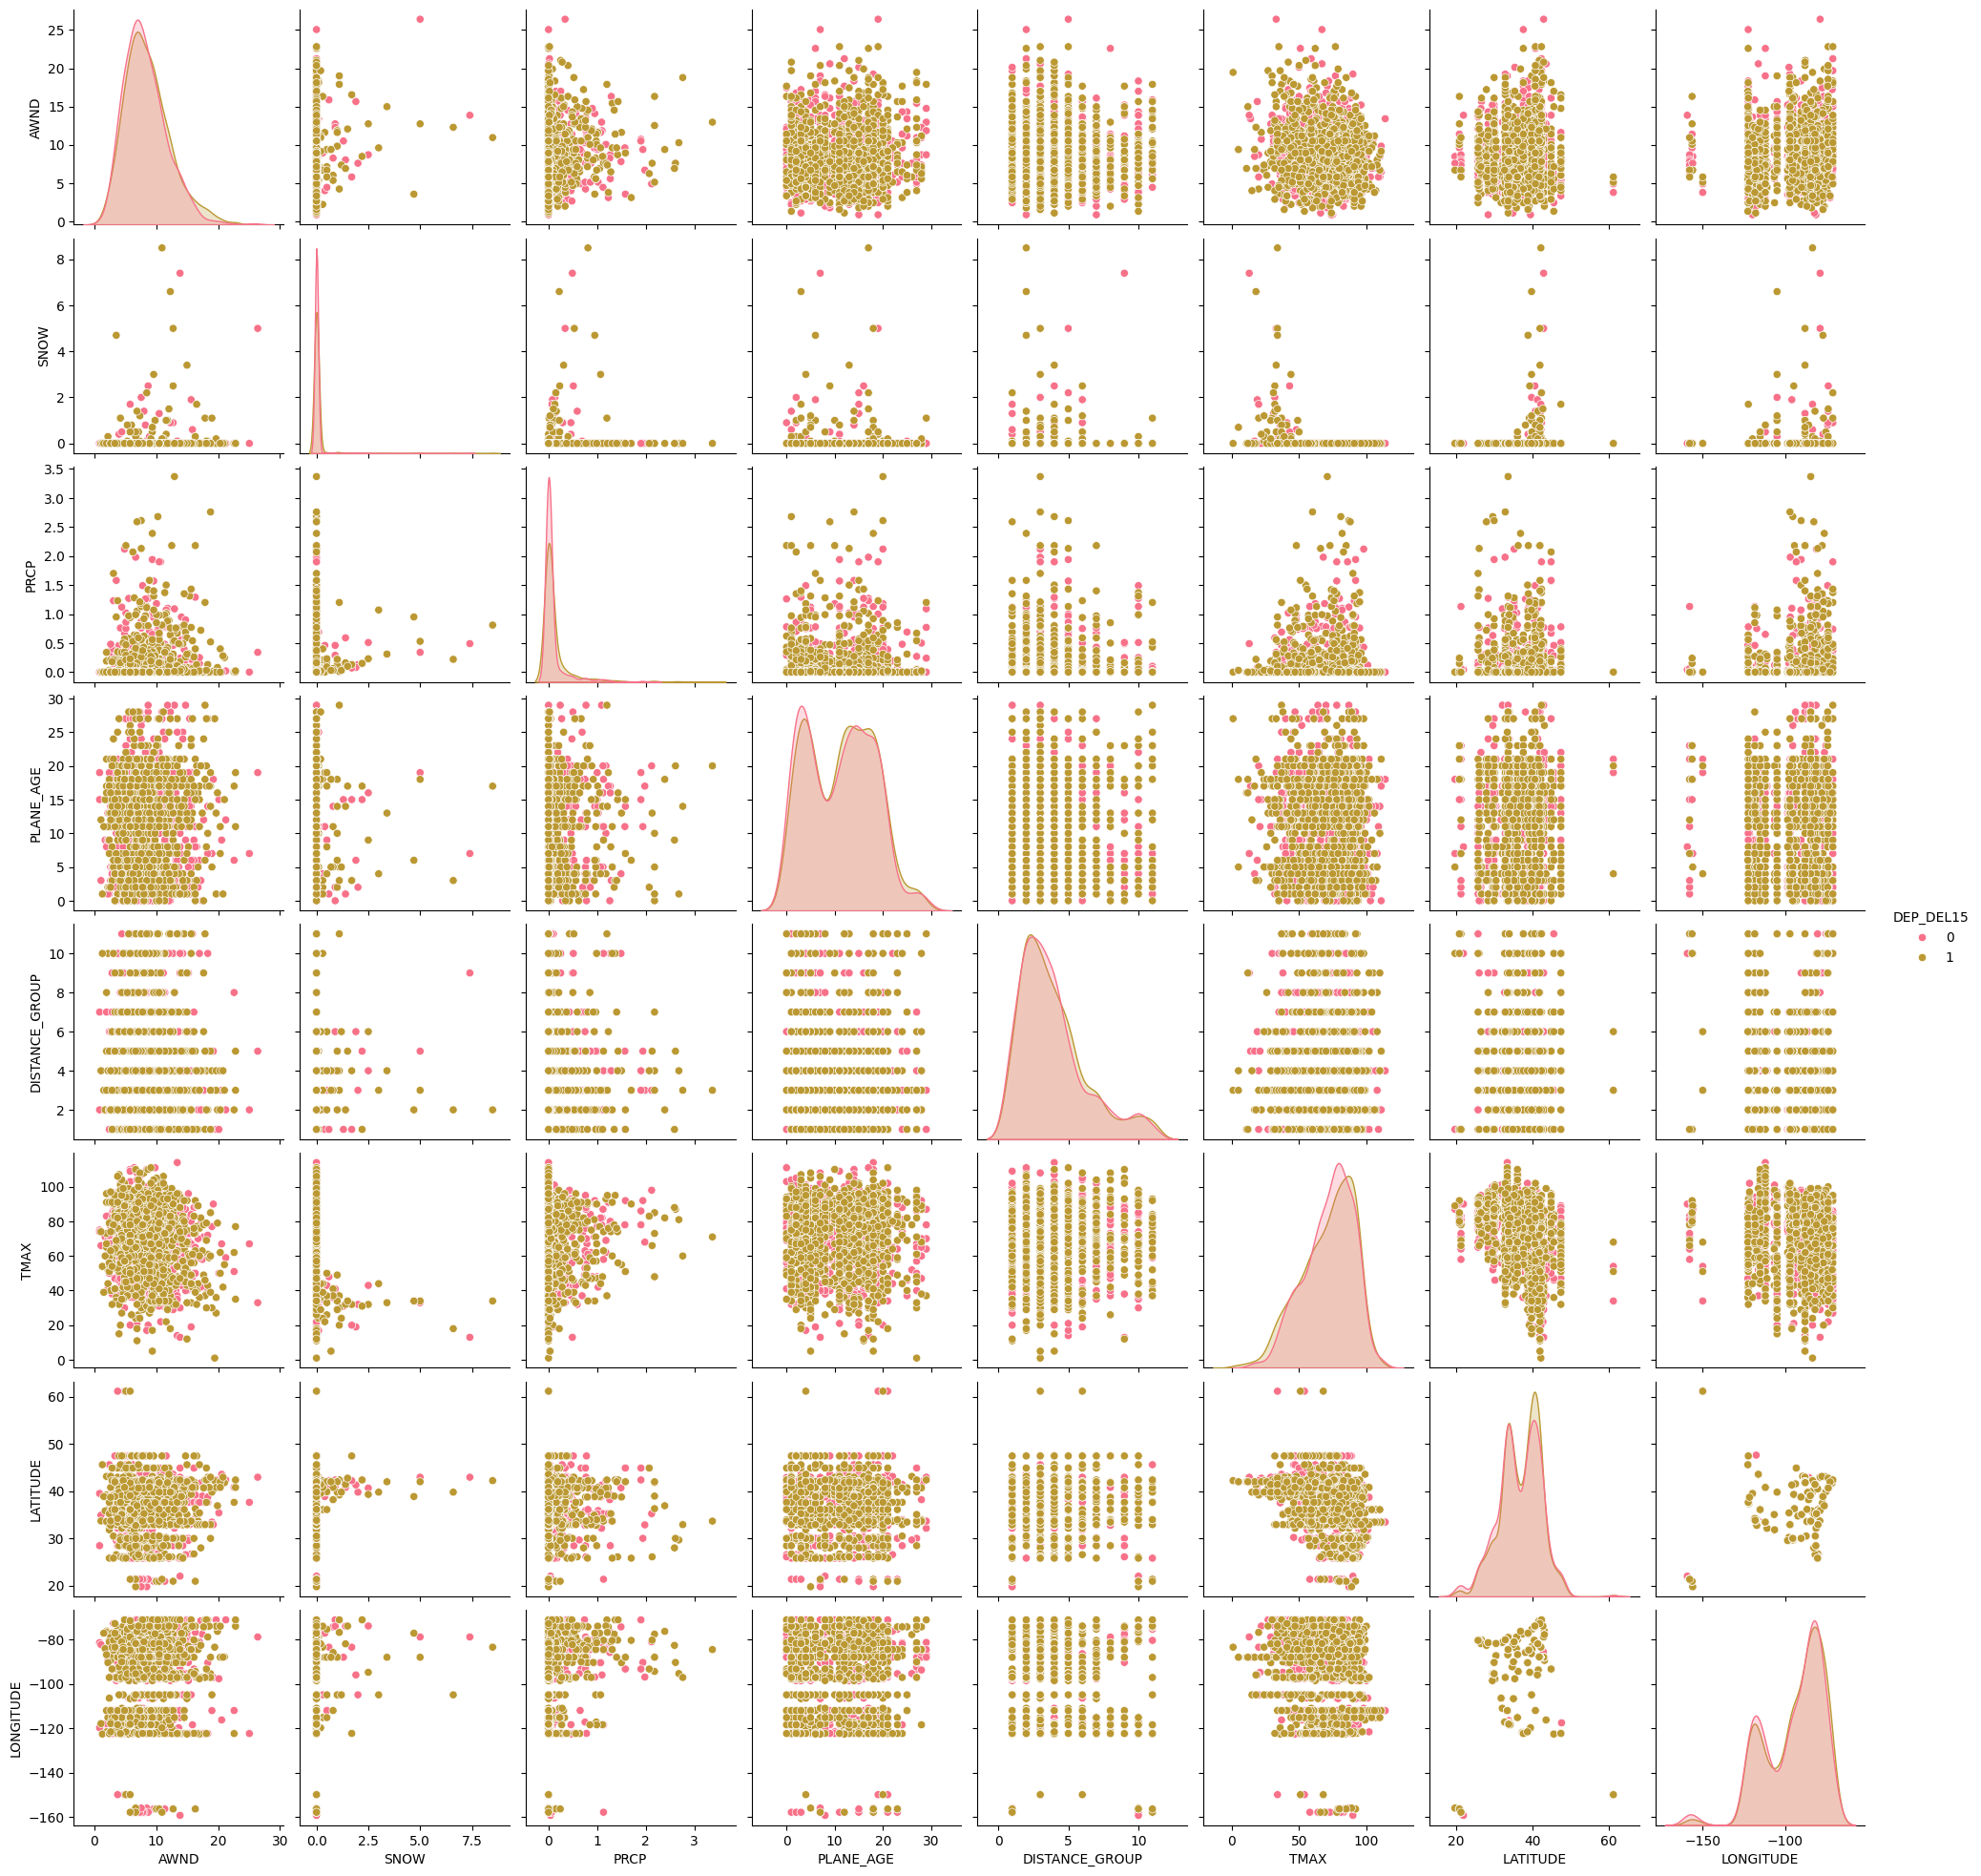

In [20]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:
colm_list = ['DEP_DEL15', 'AWND', 'SNOW', 'PRCP', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'DISTANCE_GROUP', 'TMAX', 'LATITUDE', 'LONGITUDE']
sns.pairplot(dataset_balanced[colm_list], hue='DEP_DEL15', markers='o')
plt.show()

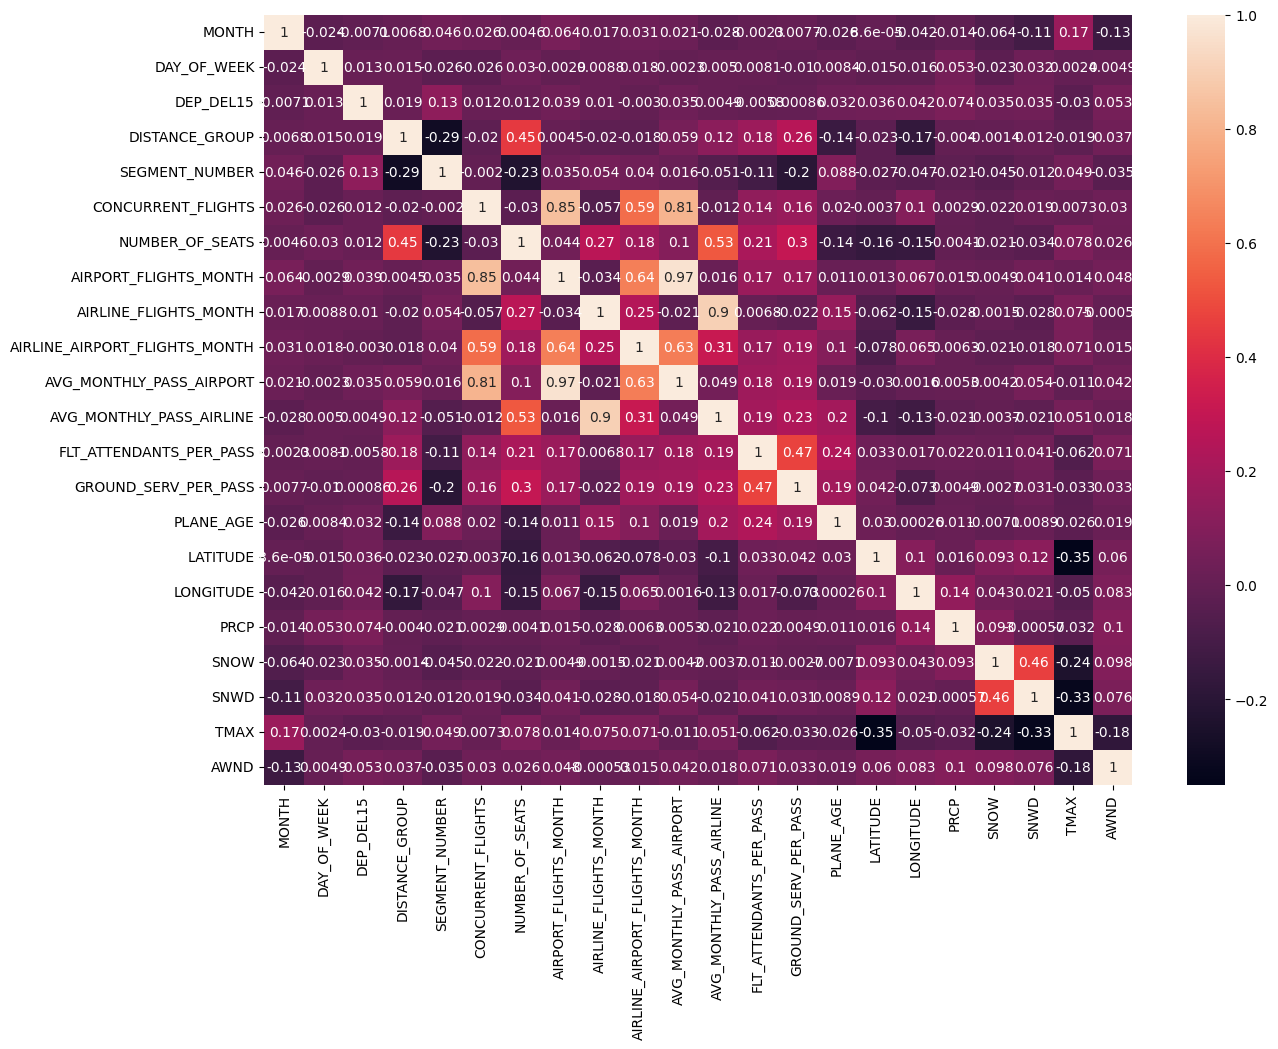

In [42]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(14,10))
sns.heatmap(dataset_balanced.corr(numeric_only = True), annot=True)
plt.show()

# Построение модели

## Разделение набора данных


In [53]:
X = dataset_balanced.drop(['DEP_DEL15'], axis=1)
y = dataset_balanced['DEP_DEL15']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (2000, 21) | y shape: (2000,) 


## Train Test разделение

In [54]:
from scipy import stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)

t_stat, p_val = stats.ttest_ind(y_train, y_test)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: 0.0
P-value: 1.0


## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [55]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.541250 (0.036034)
LDA: 0.563750 (0.030465)
KNN: 0.526250 (0.029554)
CART: 0.509375 (0.032745)
NB: 0.521875 (0.031777)
SVC: 0.504375 (0.017689)


In [56]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')

sk LDA accuracy: 0.5175
sk LDA prediction: [1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1
 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0
 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0
 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0
 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1]
sk transformed features
[[-4.84193198 -5.57014091 -1.90321174 -4.69880122 -4.51999323]]


In [58]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f'sk LDA accuracy: {lr_accuracy}')
print(f'sk LDA prediction: {lr_pred}')

sk LDA accuracy: 0.5125
sk LDA prediction: [1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1
 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0
 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1
 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Визуализация решения

In [60]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y_test, lr_pred) #Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y_test, lr_pred, average="weighted")
precision = metrics.precision_score(y_test, lr_pred, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, lr_pred, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.51
Precision (confidence when predicting a 1): 0.51
Detail:
              precision    recall  f1-score   support

           0       0.51      0.43      0.47       200
           1       0.51      0.59      0.55       200

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400

